In [ ]:
pip install scrapy

import scrapy
from datetime import datetime
from numpy import genfromtxt
from matplotlib import pyplot as plt
import numpy as np

In [1]:
import scrapy
from datetime import datetime

class BrickSetScraper(scrapy.Spider):
    name = 'brickset_spider'
    start_urls = []

    ANNEE_DEBUT = 2012
    ANNEE_FIN = 2013

# Création de la boucle qui permettra d'évaluer chaque année

    for annee in range(ANNEE_DEBUT, ANNEE_FIN+1):
        start_urls.append("https://brickset.com/sets/year-"+str(annee)+"/filter-wasavailableeu")

# Création des selector qui vont permettre d'établir le chemin menant aux informations pertinentes

    def parse(self, response):
        SET_SELECTOR = '.set'
        NAME_SELECTOR = 'h1 ::text'
        TAG_SELECTOR = 'div.tags ::text'
        PIECES_SELECTOR = './/dl[dt/text() = "Pieces"]/dd/a/text()'
        MINIFIGS_SELECTOR = './/dl[dt/text() = "Minifigs"]/dd[2]/a/text()'
        CURRENT_VALUE_SELECTOR = './/dl[dt/text() = "Value used"]/dd[4]/a/text()'
        CURRENT_VALUE_SELECTOR2 = './/dl[dt/text() = "Value new"]/dd[3]/a/text()'
        RRP_SELECTOR = './/dl[dt/text() = "PPP"]/dd/text()'
        RRP_SELECTOR2= 'div.col ::text'

# On applique désormais les selector établi ci-dessus afin de compléter le jeu de données

        for brickset in response.css(SET_SELECTOR):
            yield {
                'nom': brickset.css(NAME_SELECTOR).extract_first(),
                'numero': brickset.css(TAG_SELECTOR).extract_first(),
                'tag1': brickset.css(TAG_SELECTOR).extract()[2],
                'tag2': brickset.css(TAG_SELECTOR).extract()[4],
                'tag3': brickset.css(TAG_SELECTOR).extract()[6],
                'pieces': brickset.xpath(PIECES_SELECTOR).extract_first(),
                'minifigs': brickset.xpath(MINIFIGS_SELECTOR).extract_first(),
                'Value used': brickset.xpath(CURRENT_VALUE_SELECTOR).extract_first(), #prix d'achat utilisé du set aujourd'hui
                'Value new': brickset.xpath(CURRENT_VALUE_SELECTOR2).extract_first(), #prix d'achat neuf du set aujourd'hui
                #'Prix initial': brickset.xpath(RRP_SELECTOR).extract_first(),
                'Prix initial2': brickset.css(RRP_SELECTOR2).extract(),
            }

# Création d'un selector permettant d'étudier toutes les pages de l'année en question

        PROCHAINE_PAGE_SELECTOR = '.next a ::attr(href)'
        prochaine_page = response.css(PROCHAINE_PAGE_SELECTOR).extract_first()

        if prochaine_page:
            yield scrapy.Request(
                response.urljoin(prochaine_page),
                callback=self.parse
            )

In [ ]:
from scrapy.crawler import CrawlerProcess
process = CrawlerProcess({
    'FEED_URI': 'lego.pickle',
    'FEED_FORMAT': 'pickle'
})

process.crawl(BrickSetScraper)
process.start()

In [ ]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize


data = pd.DataFrame({'json':[{'a': 'x', 'b': 'y', 'c': 'z'},[{'a': 'x', 'b': 'y', 'c': 'z'}, {'a': 'd', 'b': 'e', 'c': 'f'}]]})

dflist = []
for index, row in data.iterrows():
    norm = json_normalize(data['json'][index])
    dflist.append(norm)

grouped = pd.concat(dflist, keys = np.arange(len(dflist)))

df2 = grouped.reset_index()

df2 = df2.pivot('level_0','level_1')

df2.index.name = None
df2.columns.names = [None, None]
df2.columns = df2.columns.map('{0[0]}_{0[1]}'.format)

In [6]:
data = np.load('/content/lego.pickle', allow_pickle=True)

In [420]:
import pandas as pd

df = pd.read_csv('lego.csv')
dd = np.array(df)
dff = pd.DataFrame(dd)

In [421]:
def Convert(string):
    li = list(string.split(","))
    return li

for i in range(n):
  dff[9][i] = Convert(dff[9][i])

In [422]:
n,m = np.shape(dff)
for i in range(n):
  for j in range(len(dff[9][i])):
    if dff[9][i][j] == 'Value new':
      dff[8][i]=dff[9][i][j+1]
    if dff[9][i][j] == 'Value used':
      dff[7][i]=dff[9][i][j+1]
    if dff[9][i][j] == 'RRP':
      temp = j+1
  if 'RRP' in dff[9][i]:
    dff[9][i] = dff[9][i][temp]
  else:
    dff[9][i] = ''

dff_temp = dff.copy()

In [423]:
for i in range(n):
  if type(dff[7][i]) == type('a'):
    dff[7][i] = float(dff[7][i].strip("~$"))
  if type(dff[8][i]) == type('a'):
    dff[8][i] = float(dff[8][i].strip("~$"))
  if "|" in dff[9][i]:
    dff[9][i] = float(dff[9][i][1:-3].strip("~$"))
  elif "$" in dff[9][i]:
    dff[9][i] = float(dff[9][i].strip("~$"))
  else:
    dff[9][i] = np.nan

In [424]:
for i in range(n):
  if dff[1][i] == dff[4][i]:
    dff[4][i] = dff[3][i]
    dff[3][i] = np.nan

In [425]:
dff['Nom du set'] = dff[0]
dff['Numéro du set'] = dff[1]
dff['Thème'] = dff[2]
dff['Sous-thème'] = dff[3]
dff['Année'] = dff[4]
dff['Pièces'] = dff[5]
dff['Nombre de minifigurines'] = dff[6]
dff['Valeur occasion'] = dff[7]
dff['Valeur neuve'] = dff[8]
dff['Prix originel'] = dff[9]

df = dff.iloc[:, 10:]

Création de la variable de valorisation des ensembles

In [426]:
df['Valorisation'] = df['Valeur neuve']/df['Prix originel']

In [427]:
df

,Nom du set,Numéro du set,Thème,Sous-thème,Année,Pièces,Nombre de minifigurines,Valeur occasion,Valeur neuve,Prix originel,Valorisation
0,Palace Cinema,10232-1,Creator Expert,Modular Buildings Collection,2013,2196,6.0,255.29,307.69,149.99,2.051403
1,Horizon Express,10233-1,Creator Expert,Trains,2013,1351,6.0,232.86,263.15,129.99,2.024386
2,City Park Cafe,3061-1,Friends,Heartlake City,2012,222,2.0,16.87,30.0,34.99,0.857388
3,Sydney Opera House,10234-1,Creator Expert,Landmarks,2013,2989,NaN,182.02,356.57,319.99,1.114316
4,Heartlake Flying Club,3063-1,Friends,General,2012,195,1.0,6.72,23.09,19.99,1.155078
...,...,...,...,...,...,...,...,...,...,...,...
245,Creative Cakes,6785-1,Duplo,NaN,2012,55,NaN,31.94,33.18,24.99,1.327731
246,The Dynamic Duo Funhouse Escape,6857-1,DC Comics Super Heroes,Batman,2012,380,5.0,53.71,66.06,39.99,1.651913
247,Catwoman Catcycle City Chase,6858-1,DC Comics Super Heroes,Batman,2012,89,2.0,10.04,18.87,12.99,1.452656
248,The Batcave,6860-1,DC Comics Super Heroes,Batman,2012,690,5.0,62.5,91.02,69.99,1.300471


Nous allons d'abord identifier le nombre de set (ou ensemble Lego) par thème qui sont contenus dans notre base de donnée.

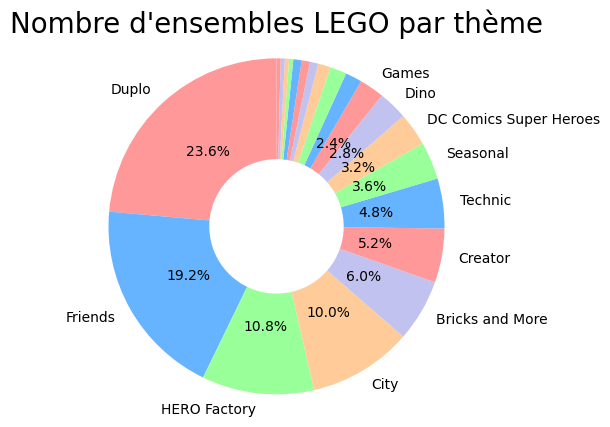

In [461]:
# Compte des ensembles par thème
theme_counts = df['Thème'].value_counts()
theme_counts_list = theme_counts.to_list()
theme_names = theme_counts.index.to_list()

# Définition des couleurs personnalisées
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(theme_counts_list, labels=theme_names, autopct="%1.1f%%", startangle=90, colors=colors, wedgeprops={'width': 0.6})

#Mise en retrait des bas pourcentage afin de favoriser la lisibilité du graphique
threshold = 2
for label, pct_label in zip(texts, autotexts):
    pct_value = pct_label.get_text().rstrip('%')
    if float(pct_value) < threshold:
        label.set_text('')
        pct_label.set_text('')

plt.title("Nombre d'ensembles LEGO par thème", fontsize=20)
plt.axis("equal")  # Un rapport d'aspect égal garantit un diagramme circulaire

# Ajout d'une ombre
plt.gca().set_aspect('equal')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white', zorder=-1))

# Affichage
plt.show()  # Affiche le diagramme circulaire

On observe en outre que 3 thèmes (Duplo, Friends et HERO Factory) représentent plus de la moitier des sets en question. Il y a donc possiblement un biais dans la sélection des ensembles lego (En dépis du fait que Lego produit ces thèmes en majorité).

Nous allons désormais nous intéresser à la distribution des prix d'origine et des prix actuels.

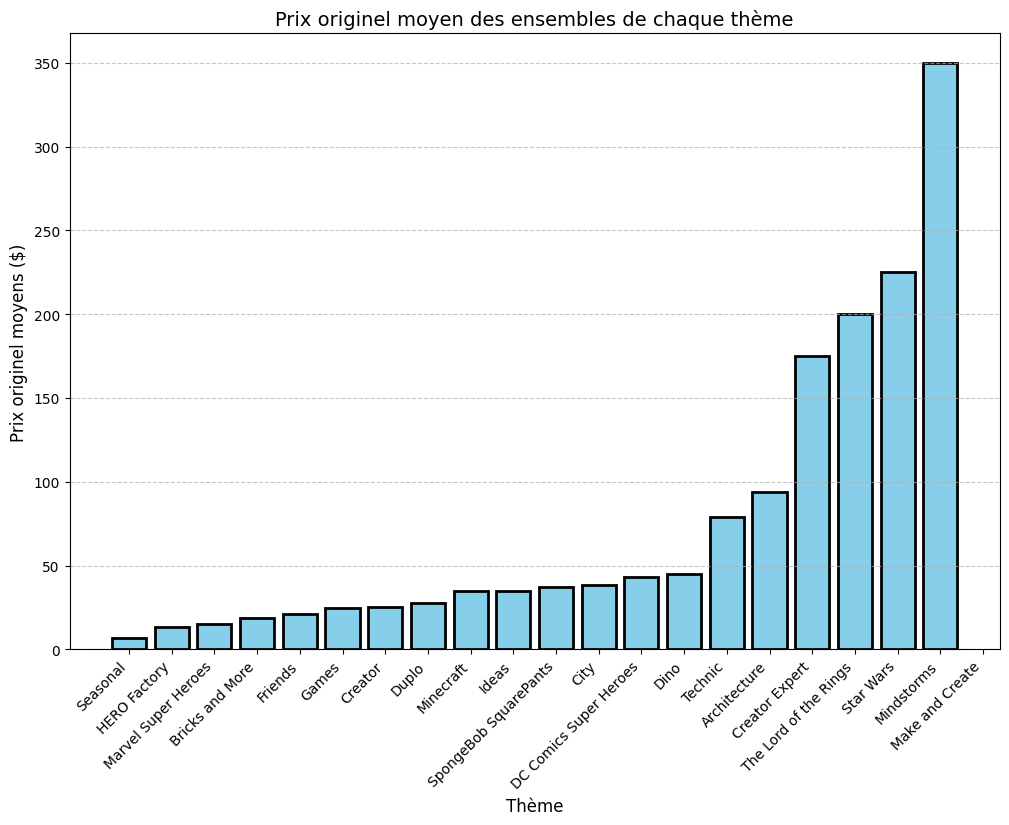

Thème
Mindstorms                349.990000
Star Wars                 224.990000
The Lord of the Rings     199.990000
Creator Expert            174.990000
Architecture               93.740000
Technic                    78.990000
Dino                       45.275714
DC Comics Super Heroes     43.490000
City                       38.630000
SpongeBob SquarePants      37.490000
Ideas                      34.990000
Minecraft                  34.990000
Duplo                      27.691754
Creator                    25.143846
Games                      24.990000
Friends                    20.927500
Bricks and More            18.836154
Marvel Super Heroes        14.990000
HERO Factory               13.656667
Seasonal                    6.656667
Make and Create                  NaN
Name: Prix originel, dtype: float64


In [429]:
# Calcul du prix moyen pour chaque thème
avg_price_by_theme = df.groupby('Thème')['Prix originel'].mean()

# Tri des prix
avg_price_by_theme = avg_price_by_theme.sort_values(ascending=False)

# Extraction des noms de thème
themes = avg_price_by_theme.index

# Mise en place de l'ordre croissant des prix moyens
df_temp1 = pd.DataFrame({'Theme': themes, 'Price per Brick': avg_price_by_theme})
df_temp1 = df_temp1.sort_values(by='Price per Brick')

themes = list(df_temp1['Theme'])
avg_prices_per_brick = list(df_temp1['Price per Brick'])

# Création de l'histogramme
plt.figure(figsize=(12, 8))
plt.bar(themes, avg_prices_per_brick, color='skyblue', edgecolor='black', linewidth=2)
plt.xlabel('Thème', fontsize=12)
plt.ylabel('Prix originel moyens ($)', fontsize=12)
plt.title('Prix originel moyen des ensembles de chaque thème', fontsize=14)

# Rotation des noms de thème pour davantage de lisibilité
plt.xticks(rotation=45, ha='right')

# Ajout des grilles
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage
plt.show()
print(avg_price_by_theme)

Ici on observe que les thèmes qui étaient moins représentés par leur nombre ont cependant les prix moyens d'ensembles lego les plus important. Au dela du manque de données cela peut s'expliquer par le fait que les thèmes plus rares s'addressent à une clientèle plus agé ce qui impose généralement des ensembles plus détaillés.

Regardons maintenant simultanement la répartition des prix actuels et des prix originels.

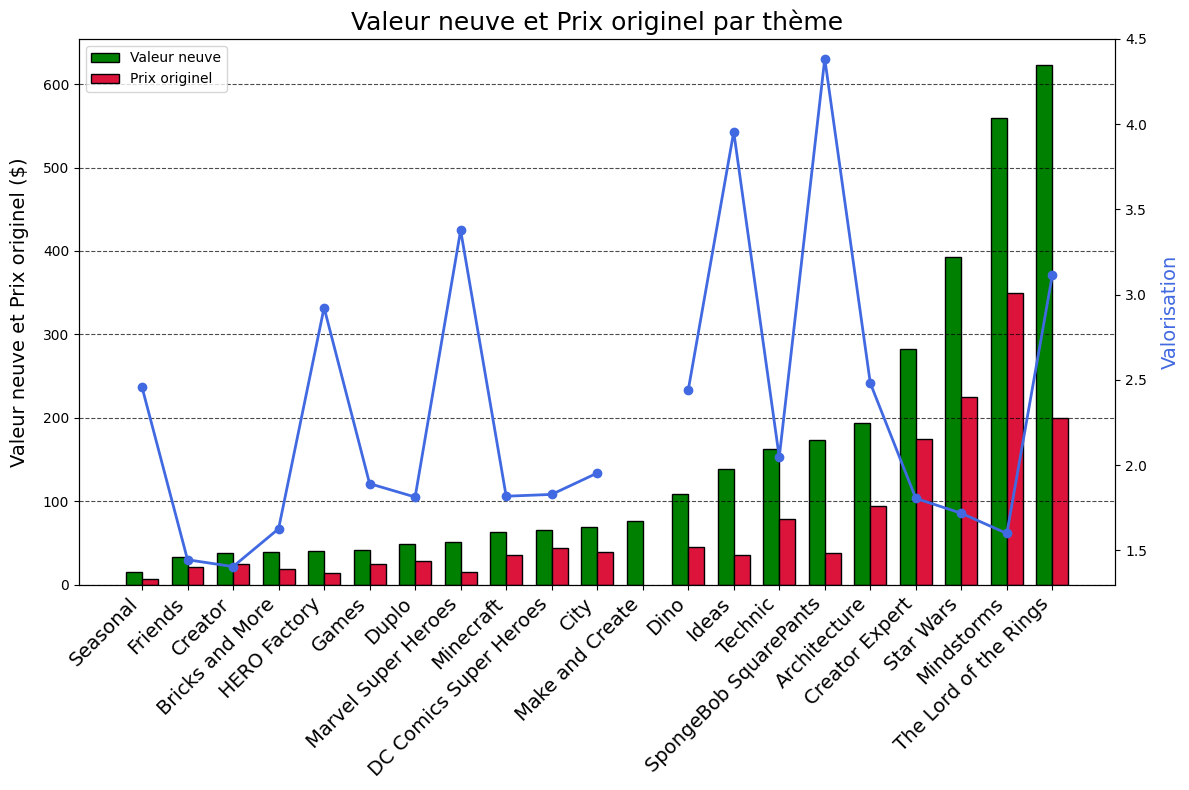

In [460]:
# Calcul du prix moyen pour chaque thème
avg_oldprice_by_theme = df.groupby('Thème')['Prix originel'].mean()
avg_newprice_by_theme = df.groupby('Thème')['Valeur neuve'].mean()
avg_valorisation_by_theme = df.groupby('Thème')['Valorisation'].mean()
themes = avg_oldprice_by_theme.index

P = pd.DataFrame({'Themes': themes, 'Valeur_neuve': avg_newprice_by_theme, 'Prix_originel': avg_oldprice_by_theme, 'Valorisation': avg_valorisation_by_theme})

# Sort the DataFrame by average revenue in descending order
P.sort_values(by='Valeur_neuve', ascending=True, inplace=True)

# Generate the bar plot
x = np.arange(len(themes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width / 2, P.Valeur_neuve, width, label='Valeur neuve', color='green', edgecolor='black')
rects2 = ax.bar(x + width / 2, P.Prix_originel, width, label='Prix originel', color='crimson', edgecolor='black')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Valeur neuve et Prix originel ($)', labelpad=10, fontsize=14)
ax.set_title('Valeur neuve et Prix originel par thème', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(P.Themes, fontsize=14, rotation=45)
ax.legend()

# Rotation des noms de thème pour davantage de lisibilité
plt.xticks(rotation=45, ha='right')

ax2 = ax.twinx()
ax2.set_ylabel('Valorisation', labelpad=10, fontsize=14, color='royalblue')
ax2.set_ylim(1.3,4.5)

# Plot revenue line chart
ax2.plot(x, P.Valorisation, color='royalblue', marker='o', linestyle='-', markersize=6, linewidth=2)

# Tighten the layout and display the plot
fig.tight_layout()
plt.show()


En outre le prix actuel des ensembles est dû en grande partie au prix de vente. La valorisation elle cependant semble moins liée au prix initial qu'au thème de l'ensemble. En effet des thèmes plus rares ou populaires (comme "The Lord of the Rings" ou "Marvel Super Heroes") prendront d'autant plus de valeur avec le temps.

Des thèmes abondant tel que Star Wars en renvanche n'auront pas nécessairement autant de valorisation en dépis de leur popularité.